In [56]:
import pandas as pd

# Cargar el archivo CSV
file_path = '../DM/Verlet_output.csv'  # Reemplaza con la ruta a tu archivo CSV
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para verificar la carga
print(data.head())


     t    r    v    a
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0


KeyboardInterrupt: 

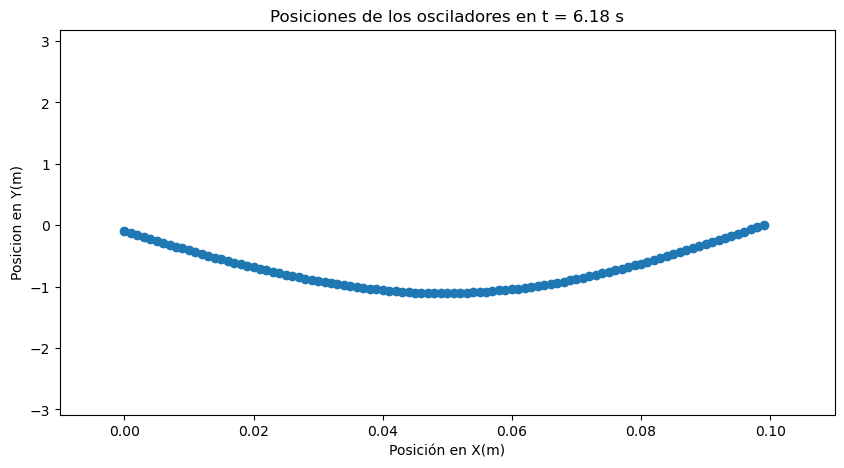

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer los tiempos únicos y seleccionar solo cada décimo (cada 0.01 segundos)
time_steps = data['t'].unique()  # Tiempos únicos
#time_steps = time_steps[::10]  # Tomar cada décimo
num_oscillators = 100  # Número de osciladores

positions = data['r'].unique()
min_position = min(positions)
max_position = max(positions)
# Crear gráficos de las posiciones de los osciladores
for t in time_steps:
    positions = data[data['t'] == t].iloc[:, 1].values  # Obtener las posiciones para el tiempo t

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 5))
    plt.errorbar(np.arange(num_oscillators) * 0.001, positions, fmt='o')  # Ajusta el error como desees
    plt.title(f'Posiciones de los osciladores en t = {t:.3f} s')  # Mostrar el tiempo en centésimas de segundo
    plt.xlabel('Posición en X(m)')
    plt.ylabel('Posicion en Y(m)')
    plt.xlim(-0.01, num_oscillators * 0.001 + 0.01)  # Ajustar límites x según sea necesario
    plt.ylim(min_position - 0.1, max_position + 0.1)  # Ajustar límites y según sea necesario
    plt.savefig(f'blob/grafico_t_{t:.3f}.png')  # Guardar la figura con el tiempo en centésimas
    plt.close()  # Cerrar la figura para liberar memoria


In [58]:
import glob
import os
import imageio.v2 as imageio
from tqdm import tqdm

def create_video(input_pattern, output_file, fps=30):
    # Create a list of images
    images = sorted(glob.glob(input_pattern), key=lambda x: float(x.split('_')[-1][:-4]))
    
    # Check if images were found
    if not images:
        print(f"No images found matching the pattern: {input_pattern}")
        return False

    try:
        # Get the first image to determine dimensions
        first_image = imageio.imread(images[0])
        height, width = first_image.shape[:2]

        # Create a writer object
        writer = imageio.get_writer(output_file, fps=fps, macro_block_size=None)

        # Read and write images
        for image_path in tqdm(images, desc="Processing images"):
            image = imageio.imread(image_path)
            writer.append_data(image)

        # Close the writer
        writer.close()
        
        print(f"Video created successfully: {output_file}")
        return True
    except Exception as e:
        print(f"An error occurred while creating the video: {e}")
        return False

# Usage
input_pattern = "blob/grafico_t_*.png"
output_file = 'video_osciladores3.mp4'
success = create_video(input_pattern, output_file)


Processing images: 100%|██████████| 1001/1001 [00:10<00:00, 96.39it/s]


Video created successfully: video_osciladores3.mp4


In [59]:
from IPython.display import Video
url = 'video_osciladores3.mp4'
Video(url)